# Nussinovův algoritmus

In [262]:
import numpy as np
import pandas as pd

In [263]:
# http://rna.informatik.uni-freiburg.de/Teaching/index.jsp?toolName=Nussinov

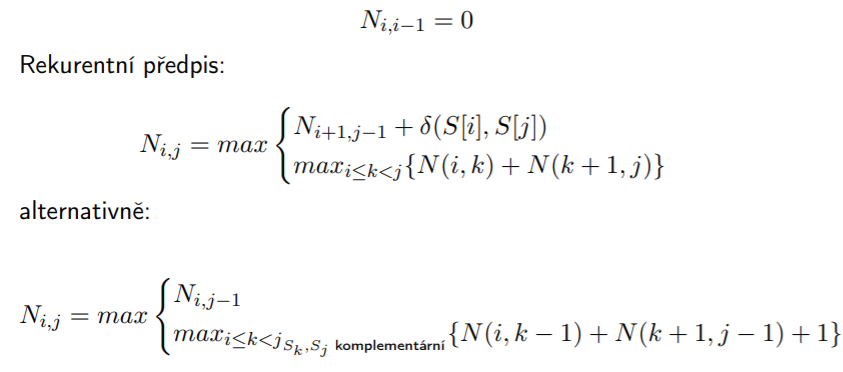

In [264]:
def is_complementary(S_i, S_j):   
    if (S_i == 'A' and S_j == 'U') or (S_i == 'U' and S_j == 'A'):
        return True

    if (S_i == 'C' and S_j == 'G') or (S_i == 'G' and S_j == 'C'):
        return True
    
    return False

In [265]:
def score(i, j, characters):
    S_i = characters[i]
    S_j = characters[j]
    result = 1 if is_complementary(S_i, S_j) else 0
    return result 

In [266]:
def calculate_second(N, i, j):
    calcs = []
    
    for k in range(i, j):
        a = N[i, k]
        b = N[k + 1, j]
        calcs.append(int(a + b))
            
    return np.max(calcs)

In [267]:
def get_value(N, i, j, characters):
    first = N[i + 1, j - 1] + score(i, j, characters)
    second = calculate_second(N, i, j)
    result = np.max([first, second])
    return result

In [268]:
def nussin(sequence):
    characters = list(sequence)
    size = len(characters)
    
    #Initialization is here in creating numpy array full of zeros
    N = np.zeros(shape=(size, size))
    
    #Dynamic programming
    for k in range(1, size):
        for i in range(size - k): #+1 ?
            j = i + k
            N[i, j] = get_value(N, i, j, characters)
            
    return pd.DataFrame(N) 

In [269]:
nussin('ACCAGCU')

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
1,0.0,0.0,0.0,0.0,1.0,1.0,2.0
2,0.0,0.0,0.0,0.0,1.0,1.0,2.0
3,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [325]:
def traceback(i, j, N, seq):
    characters = list(seq)
    if j <= i:
        return
    elif N[i, j] == N[i, j - 1]:
        traceback(i, j - 1, N, seq)
        return
    else:
        for k in range(i, j):
            ic = is_complementary(characters[k], characters[j])
            if k >= 0 and ic and N[i, j] == (0 if k == 0 else N[i, k - 1]) + N[k+1, j-1] + 1:
                print(k, j)
                traceback(i, k - 1, N, seq)
                traceback(k + 1, j - 1, N, seq)
                return

In [326]:
genome = 'GCACGACG'

In [327]:
df = nussin(genome)
df

,0,1,2,3,4,5,6,7
0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 

In [328]:
traceback(0, len(seq)-1, np.array(df), genome)

3 7
0 1
4 6
